In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/project/kcure-08/lib/python3.7/site-packages')

In [2]:
print(os.getcwd()) # 현재 경로
# print(os.listdir(os.getcwd())) # 현재 경로 파일

os.chdir('/project/kcure-08/src/1. Data/1. Colon') # 현재 경로 변경(데이터 파일)
print(os.getcwd())
# print(os.listdir(os.getcwd()))

/project/kcure-08/src/2. Model/1. Colon
/project/kcure-08/src/1. Data/1. Colon


In [3]:
### 최종 재발과 재발없는 피험자 테이블 불러오기 ###
df_cs_cc_rec = pd.read_csv('./PP_csv/cs_cc_rec_fin.csv') # 암 재발 피험자
df_cs_cc_nrec = pd.read_csv('./PP_csv/cs_cc_nrec_fin.csv') # 암 재발이 없는 피험자 (대장암 진단 이후)

In [4]:
# ### 데이터 모든 행, 열 확인하기
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [6]:
df_cs_cc_rec[['TCODE']].value_counts()

TCODE
10       73
6        59
9        16
0        12
1        10
5         8
3         6
2         5
8         4
7         1
dtype: int64

In [7]:
df_cs_cc_nrec[['TCODE']].value_counts()

TCODE
10       6630
6        5843
1        3011
9        2076
3        1033
0         738
5         712
2         639
8         475
4         186
7         117
dtype: int64

In [16]:
#### 원발부위코드
df = pd.concat([df_cs_cc_rec, df_cs_cc_nrec ])
df_re = df[df['LABEL'] == 1]
scc = df_re['TCODE'].value_counts()
scc

10    73
6     59
9     16
0     12
1     10
5      8
3      6
2      5
8      4
7      1
Name: TCODE, dtype: int64

In [18]:
all_scc = df['TCODE'].value_counts()


In [19]:
rel_frq = scc / all_scc

In [23]:
rel_frq.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

Text(0, 0.5, 'Relative Frequency')

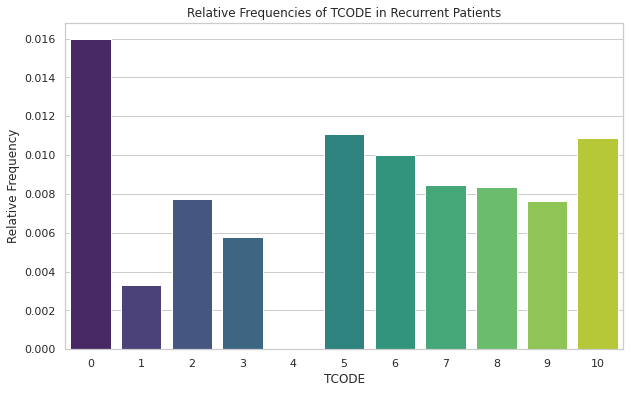

In [24]:
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x=rel_frq.index, y = rel_frq.values, palette='viridis')
ax.set_title('Relative Frequencies of TCODE in Recurrent Patients')
ax.set_xlabel('TCODE')
ax.set_ylabel('Relative Frequency')

# fig, ax = plt.subplots(figsize = (10, 6))
# rel_frq.plot(kind='bar', ax=ax)
# ax.set_title('재발 환자 중 원발부위코드 빈도수')
# ax.set_xlabel('원발부위코드')
# ax.set_ylabel('상대적 빈도수')
# plt.show()

Text(0, 0.5, 'Relative Frequency')

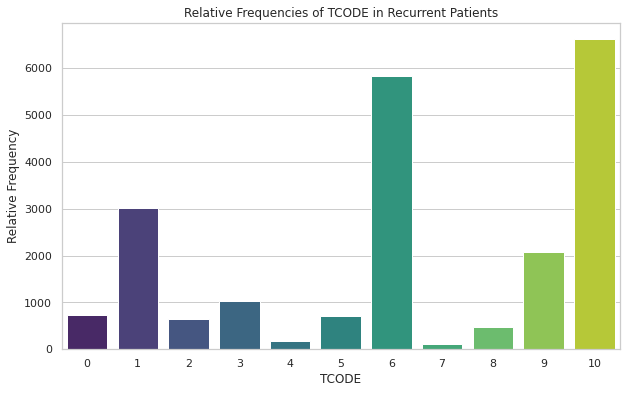

In [29]:
#### 원발부위코드
df = pd.concat([df_cs_cc_rec, df_cs_cc_nrec ])
df_nre = df[df['LABEL'] == 0]
scc = df_nre['TCODE'].value_counts()
# all_scc = df['TCODE'].value_counts()
# rel_frq = scc / all_scc

import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x=scc.index, y = scc.values, palette='viridis')
ax.set_title('Relative Frequencies of TCODE in Recurrent Patients')
ax.set_xlabel('TCODE')
ax.set_ylabel('Relative Frequency')

In [30]:
scc

10    6630
6     5843
1     3011
9     2076
3     1033
0      738
5      712
2      639
8      475
4      186
7      117
Name: TCODE, dtype: int64

## 1) 건강행동

In [62]:
df_cs_cc_rec[['Q_SMK_YN']].value_counts()

Q_SMK_YN
1.0         76
2.0         39
3.0         30
dtype: int64

In [61]:
df_cs_cc_nrec[['Q_SMK_YN']].value_counts()

Q_SMK_YN
1.0         9017
2.0         3818
3.0         3484
dtype: int64

In [69]:
from scipy.stats import chi2_contingency
# chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(df_hb['LABEL'], [df_hb['Q_SMK_YN'], df_hb['Q_DRK_RISK'], df_hb['WT_LSS']]))

In [47]:
pd.crosstab(df_hb['LABEL'], [df_hb['Q_SMK_YN'], df_hb['Q_DRK_RISK'], df_hb['WT_LSS']])

Q_SMK_YN   1.0         2.0         3.0        
Q_DRK_RISK 0.0     3.0 0.0 1.0 3.0 0.0     3.0
WT_LSS     1.0 2.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0
LABEL                                         
1           38   1   1  13   1   2  10   1   3

In [ ]:
귀무가설 : 흡연여부와 재발 유무는 관련성이 없다
대립가설 : ~ 관련성 있다

In [67]:
result = pd.crosstab(df_hb['LABEL'], df_hb['Q_SMK_YN'] )
result

Q_SMK_YN,1.0,2.0,3.0
LABEL,,,
0,9017,3818,3484
1,76,39,30


In [70]:
import scipy.stats as stats
stats.chi2_contingency(observed = result)
'''
(0.9910677036310797, # chi-square값 (소숫점 셋째자리)
 0.6092455736084654, # p-value
 2, # 자유도
 array([[9012.91709184, 3823.03103741, 3483.05187075],
        [  80.08290816,   33.96896259,   30.94812925]])) # 기대치
'''

(0.9910677036310797,
 0.6092455736084654,
 2,
 array([[9012.91709184, 3823.03103741, 3483.05187075],
        [  80.08290816,   33.96896259,   30.94812925]]))

In [75]:
result = pd.crosstab(df_hb['LABEL'], df_hb['Q_DRK_RISK'] )
result

Q_DRK_RISK,0.0,1.0,2.0,3.0
LABEL,,,,
0,14930,652,223,511
1,127,4,1,13


In [73]:
import scipy.stats as stats
stats.chi2_contingency(observed = result)
'''
(16.642602493458213,
 0.0008369988316330028,
 3,
 array([[1.49243674e+04, 6.50221493e+02, 2.22026851e+02, 5.19384242e+02],
        [1.32632586e+02, 5.77850677e+00, 1.97314865e+00, 4.61575846e+00]]))
'''

(16.642602493458213,
 0.0008369988316330028,
 3,
 array([[1.49243674e+04, 6.50221493e+02, 2.22026851e+02, 5.19384242e+02],
        [1.32632586e+02, 5.77850677e+00, 1.97314865e+00, 4.61575846e+00]]))

In [76]:
result = pd.crosstab(df_hb['LABEL'], df_hb['WT_LSS'] )
result

WT_LSS,1.0,2.0
LABEL,,
0,12264,351
1,68,2


In [78]:
import scipy.stats as stats
stats.chi2_contingency(observed = result)
'''
(0.0,
 1.0,
 1,
 array([[1.22639480e+04, 3.51052030e+02],
        [6.80520300e+01, 1.94797004e+00]]))
'''

(0.0,
 1.0,
 1,
 array([[1.22639480e+04, 3.51052030e+02],
        [6.80520300e+01, 1.94797004e+00]]))

In [51]:
df_hb['LABEL'].value_counts()

0    21460
1      194
Name: LABEL, dtype: int64

In [54]:
df_hb[['Q_SMK_YN']].value_counts()

Q_SMK_YN
1.0         76
2.0         39
3.0         30
dtype: int64

In [57]:
a = df_hb[df_hb['LABEL']==0]
a['Q_SMK_YN'].value_counts()

Series([], Name: Q_SMK_YN, dtype: int64)

In [48]:
print(f"p-value: {p_value}")

p-value: 1.0


In [5]:
df_cs_cc_rec_hb = df_cs_cc_rec[['LABEL','Q_SMK_YN', 'Q_DAILY_DRK', 'Q_DRK_RISK', 'Q_PA_WGT_AVG', 'WT_LSS', 'WT_LSS_AMT']]
df_cs_cc_nrec_hb = df_cs_cc_nrec[['LABEL','Q_SMK_YN',  'Q_DAILY_DRK', 'Q_DRK_RISK', 'Q_PA_WGT_AVG', 'WT_LSS', 'WT_LSS_AMT']]

In [6]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df_cs_cc_rec_hb['Q_SMK_YN'], df_cs_cc_nrec_hb['Q_SMK_YN'], nan_policy = 'omit')
print(t_statistic, p_value) # 0.32408586012321894 0.745877149081392

0.32408586012321894 0.745877149081392


In [8]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df_cs_cc_rec_hb['Q_DAILY_DRK'], df_cs_cc_nrec_hb['Q_DAILY_DRK'], nan_policy = 'omit')
print(t_statistic, p_value) # -1.588472671673721 0.11219923263321416

-1.588472671673721 0.11219923263321416


In [9]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df_cs_cc_rec_hb['Q_DRK_RISK'], df_cs_cc_nrec_hb['Q_DRK_RISK'], nan_policy = 'omit')
print(t_statistic, p_value) # 3.003260344336998 0.002675051724404269

3.003260344336998 0.002675051724404269


In [11]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df_cs_cc_rec_hb['Q_PA_WGT_AVG'], df_cs_cc_nrec_hb['Q_PA_WGT_AVG'], nan_policy = 'omit')
print(t_statistic, p_value) # -0.1339749331664404 0.8934240347916677

-0.1339749331664404 0.8934240347916677


In [12]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df_cs_cc_rec_hb['WT_LSS'], df_cs_cc_nrec_hb['WT_LSS'], nan_policy = 'omit')
print(t_statistic, p_value) # 0.037910385286380764 0.9697597293972584

0.037910385286380764 0.9697597293972584


In [13]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df_cs_cc_rec_hb['WT_LSS_AMT'], df_cs_cc_nrec_hb['WT_LSS_AMT'], nan_policy = 'omit')
print(t_statistic, p_value) # -1.0831314064652304 0.27951988447113074

-1.0831314064652304 0.27951988447113074


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

df_hb = pd.concat([df_cs_cc_rec_hb, df_cs_cc_nrec_hb])

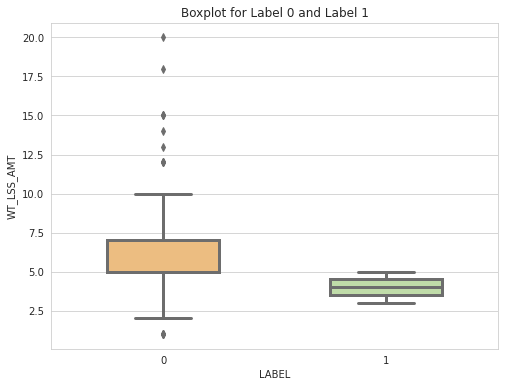

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(x='LABEL', y = 'WT_LSS_AMT', data=df_hb, palette= 'Spectral', linewidth = 3, width = 0.5)
plt.title('Boxplot for Label 0 and Label 1')
plt.show()

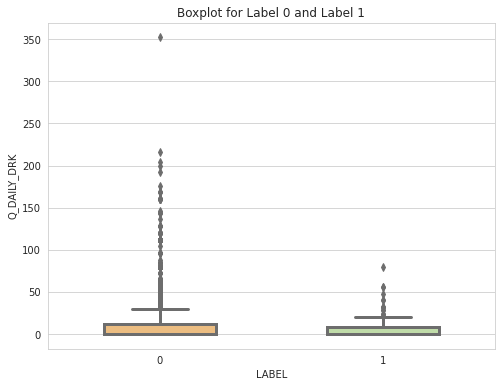

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x='LABEL', y = 'Q_DAILY_DRK', data=df_hb, palette= 'Spectral', linewidth = 3, width = 0.5)
plt.title('Boxplot for Label 0 and Label 1')
plt.show()

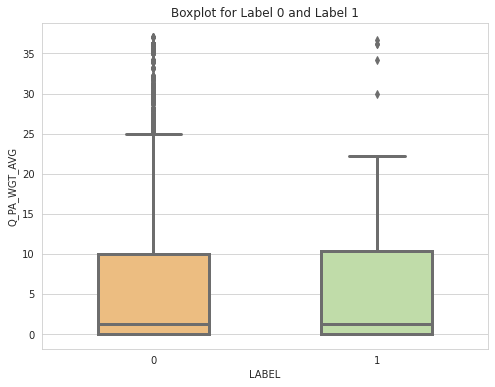

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x='LABEL', y = 'Q_PA_WGT_AVG', data=df_hb, palette= 'Spectral', linewidth = 3, width = 0.5)
plt.title('Boxplot for Label 0 and Label 1')
plt.show()

In [30]:
df_cs_cc_rec_hb[['Q_DRK_RISK']].value_counts()

Q_DRK_RISK
0.0           127
3.0            13
1.0             4
2.0             1
dtype: int64

In [ ]:
df_cs_cc_rec_hb[['Q_DRK_RISK']].value_counts()

In [16]:
df_cs_cc_nrec_hb[['Q_SMK_YN']].value_counts()

Q_SMK_YN
1.0         9017
2.0         3818
3.0         3484
dtype: int64

In [7]:
df_cs_cc_nrec_hb.describe()

,LABEL,Q_SMK_YN,Q_DAILY_DRK,Q_DRK_RISK,Q_PA_WGT_AVG,WT_LSS,WT_LSS_AMT
count,21460.0,16319.000000,15888.000000,16316.000000,16310.000000,12615.000000,339.000000
mean,0.0,1.660947,8.946891,0.161253,5.933562,1.027824,5.929204
std,0.0,0.806922,17.298561,0.592048,8.494847,0.164475,2.514044
min,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,0.0,1.000000,0.000000,0.000000,1.200000,1.000000,5.000000
75%,0.0,2.000000,12.000000,0.000000,10.000000,1.000000,7.000000
max,0.0,3.000000,352.000000,3.000000,37.000000,2.000000,20.000000


In [8]:
df_cs_cc_rec_hb.describe()

,LABEL,Q_SMK_YN,Q_DAILY_DRK,Q_DRK_RISK,Q_PA_WGT_AVG,WT_LSS,WT_LSS_AMT
count,194.0,145.000000,132.000000,145.000000,145.000000,70.000000,2.000000
mean,1.0,1.682759,6.549242,0.310345,5.838621,1.028571,4.000000
std,0.0,0.796725,13.384379,0.878108,8.582073,0.167802,1.414214
min,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,3.500000
50%,1.0,1.000000,0.000000,0.000000,1.200000,1.000000,4.000000
75%,1.0,2.000000,8.325000,0.000000,10.300000,1.000000,4.500000
max,1.0,3.000000,80.000000,3.000000,36.700000,2.000000,5.000000


In [13]:
df_cs_cc_nrec_hb.corr()

,Q_SMK_YN,Q_DAILY_DRK,Q_DRK_RISK,Q_PA_WGT_AVG,WT_LSS,WT_LSS_AMT
Q_SMK_YN,1.000000,0.312931,0.091150,0.026015,0.019373,0.099702
Q_DAILY_DRK,0.312931,1.000000,0.796028,0.038291,0.003390,-0.050773
Q_DRK_RISK,0.091150,0.796028,1.000000,0.009486,0.005996,-0.017009
Q_PA_WGT_AVG,0.026015,0.038291,0.009486,1.000000,-0.005503,-0.023515
WT_LSS,0.019373,0.003390,0.005996,-0.005503,1.000000,NaN
WT_LSS_AMT,0.099702,-0.050773,-0.017009,-0.023515,NaN,1.000000


In [14]:
df_cs_cc_rec_hb.corr()

,Q_SMK_YN,Q_DAILY_DRK,Q_DRK_RISK,Q_PA_WGT_AVG,WT_LSS,WT_LSS_AMT
Q_SMK_YN,1.000000,0.243829,0.191335,0.055125,0.080034,1.0
Q_DAILY_DRK,0.243829,1.000000,0.724930,-0.109011,-0.007881,1.0
Q_DRK_RISK,0.191335,0.724930,1.000000,-0.029155,-0.055165,NaN
Q_PA_WGT_AVG,0.055125,-0.109011,-0.029155,1.000000,0.076530,-1.0
WT_LSS,0.080034,-0.007881,-0.055165,0.076530,1.000000,NaN
WT_LSS_AMT,1.000000,1.000000,NaN,-1.000000,NaN,1.0


In [ ]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(df_cs_cc_nrec['BMI'], df_cs_cc_rec['BMI'], nan_policy = 'omit')
print(t_statistic, p_value) # 1.039981306802967 0.29836385930406867